# Course 2 Docker image

Check out our courses at [opencv.org/courses](https://www.opencv.org/courses)
<br>
This is a sample notebook to demonstrate how to write cpp code in xeus-cling.

Xeus-cling is a Jupyter kernel for C++ based on the C++ interpreter cling and the native implementation of the Jupyter protocol xeus.

### `#include` files

To link opencv and other libraries, you have to run special commands at the beginning of the notebook.<br>
We have already bundled up the commands in `includeLibraries.h`. Include the header file everytime you create a new notebook. Make sure it is at the beginning

In [1]:
#include "/usr/local/lib/includeLibraries.h"

These are the `#include` files you use for all your programs.

In [2]:
#include <iostream>
#include <opencv2/opencv.hpp>

In [3]:
#include <tesseract/baseapi.h>

In [4]:
#include <dlib/opencv.h>
#include <dlib/image_processing.h>
#include "../Extras/renderFace.hpp"

In [5]:
#include <torch/torch.h>
#include <torch/script.h>

And then these are helper files which are necessary to display images in this notebook.<br>
`cv::imshow()` does not work in this notebook, hence we use matplotlib implementation of CPP. More about `matplotlib-cpp` later.

In [6]:
#include "/usr/local/lib/displayImages.h"
#include "/usr/local/lib/matplotlibcpp.h"

Note: `im` is used as `namespace` in these headerfiles. Refrain from naming your variables `im`.

### `using namespace`
You can use `namespace` like a regular CPP program.<br>

In [7]:
using namespace std;

In [8]:
using namespace cv;

In [9]:
using namespace tesseract;

In [10]:
using namespace dlib;

If you plan on using `matplotlib-cpp` then run the following command for simplicity.

In [11]:
using namespace matplotlibcpp;

### Testing the CPP kernel
We start with printing "Hello World!" and the OpenCV version.

In [12]:
cout << "Hello, World!" << endl;

Hello, World!


### Testing the OpenCV installation

In [13]:
cout << "OpenCV version : " << CV_VERSION << endl;
cout << "Major version : " << CV_MAJOR_VERSION << endl;
cout << "Minor version : " << CV_MINOR_VERSION << endl;
cout << "Subminor version : " << CV_SUBMINOR_VERSION << endl;

OpenCV version : 4.4.0
Major version : 4
Minor version : 4
Subminor version : 0


And now, onto reading an image. Just standard OpenCV stuff.

In [14]:
Mat testImage = imread("../Extras/Quick_brown_fox.png");

### Displaing images using matplotlib-cpp
Check the following command on how to print images in CPP notebook.

Note: If you use this method, refrain from using `C++11` kernel.

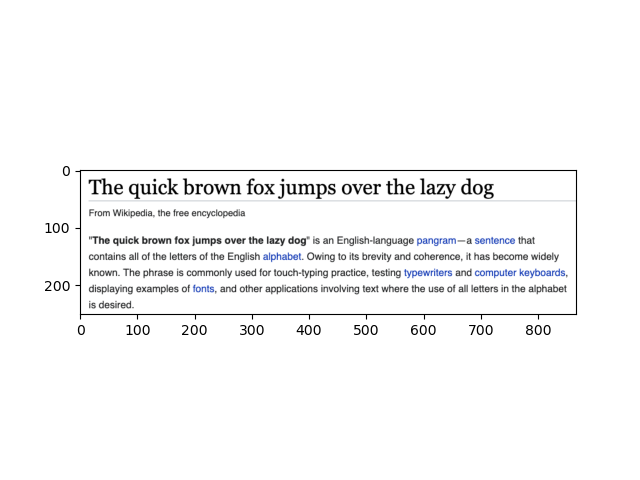

In [15]:
plt::figure();
plt::imshow(testImage);
auto pltImg = displayImage(testImage);
pltImg

### Testing the Tesseract-ocr installation
We'll be detectecting text from the above image.

In [16]:
string outText;
TessBaseAPI *ocr = new TessBaseAPI();

ocr->Init(NULL, "eng", OEM_LSTM_ONLY);
ocr->SetPageSegMode(PSM_AUTO);
ocr->SetImage(testImage.data, testImage.cols, testImage.rows, 3, testImage.step);

outText = string(ocr->GetUTF8Text());
cout << outText << endl;

The quick brown fox jumps over the lazy dog

From Wikipedia, the free encyclopedia

"The quick brown fox jumps over the lazy dog" is an English-language pangram—a sentence that
contains all of the letters of the English alphabet. Owing to its brevity and coherence, it has become widely
known. The phrase is commonly used for touch-typing practice, testing typewriters and computer keyboards,

displaying examples of fonts, and other applications involving text where the use of all letters in the alphabet
is desired.



In the Docker image, we have only provided with English trained data. If you want to detect more languages, download the `<language>.traineddata` from [here](https://github.com/tesseract-ocr/tessdata), and save the file to `/usr/local/tessdata`.

### Testing the Libtorch installation

In [17]:
#include <ATen/ATen.h>

at::Tensor a = at::ones({2, 2}, at::kInt);
at::Tensor b = at::randn({2, 2});
auto c = a + b.to(at::kInt);

cout << "a: " << a << endl;
cout << endl;
cout << "b: " << b << endl;
cout << endl;
cout << "c: " << c << endl;

a:  1  1
 1  1
[ CPUIntType{2,2} ]

b: -0.0518 -2.1101
-0.4979  1.7203
[ CPUFloatType{2,2} ]

c:  1 -1
 1  2
[ CPUIntType{2,2} ]


### Testing the Dlib installation
Note: Dlib runs slow in the xeus-cling notebooks.

This is a helper function to write the detected face landmarks onto the file

In [18]:
void writeLandmarksToFile(full_object_detection &landmarks, const string &filename)
{
	std::ofstream ofs;
	ofs.open(filename);

	for (int i = 0; i < landmarks.num_parts(); i++)
		ofs << landmarks.part(i).x() << " " << landmarks.part(i).y() << endl;
	ofs.close();
}

This is the driver codeblock which tests the dlib installation

In [19]:
frontal_face_detector faceDetector = get_frontal_face_detector();
shape_predictor landmarkDetector;

deserialize("../Extras/shape_predictor_68_face_landmarks.dat") >> landmarkDetector;

string imageFilename("../Extras/family.jpg");
Mat img = imread(imageFilename);

string landmarksBasename("results/family");
cv_image<bgr_pixel> dlibIm(img);

std::vector<dlib::rectangle> faceRects = faceDetector(dlibIm);
cout << "Number of faces detected: " << faceRects.size() << endl;
std::vector<full_object_detection> landmarksAll;

for (int i = 0; i < faceRects.size(); i++) {
    full_object_detection landmarks = landmarkDetector(dlibIm, faceRects[i]);

    if (i == 0) cout << "Number of landmarks : " << landmarks.num_parts() << endl;

    landmarksAll.push_back(landmarks);
    renderFace(img, landmarks);

    stringstream landmarksFilename;
    landmarksFilename << landmarksBasename <<  "_"  << i << ".txt";
    cout << "Saving landmarks to " << landmarksFilename.str() << endl;
    writeLandmarksToFile(landmarks, landmarksFilename.str());
}

string outputFilename("results/familyLandmarks.jpg");
cout << "Saving output image to " << outputFilename << endl;
imwrite(outputFilename, img);

Number of faces detected: 5
Number of landmarks : 68
Saving landmarks to results/family_0.txt
Saving landmarks to results/family_1.txt
Saving landmarks to results/family_2.txt
Saving landmarks to results/family_3.txt
Saving landmarks to results/family_4.txt
Saving output image to results/familyLandmarks.jpg


While displaying the image next time, we don't specify `pltImg` as `auto`.

`auto` should be specified only for the first time.

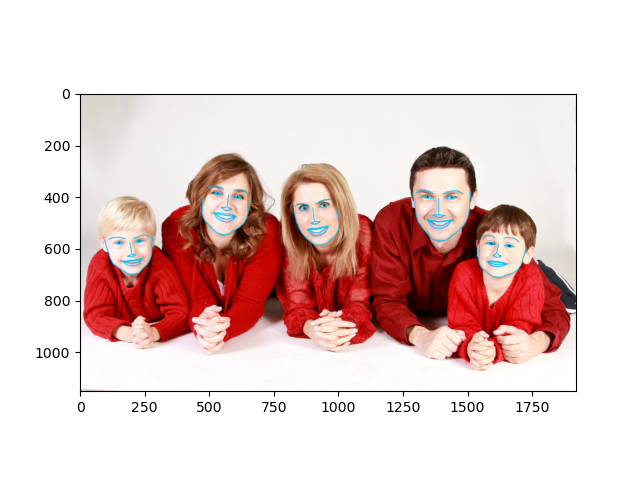

In [20]:
plt::figure();
plt::imshow(img);
pltImg = displayImage(img);
pltImg

### Display images using markdown.

Use `imwrite()` function of `OpenCV` and save the image to your local machine.<br>
Then display the image using `<img>` tag